In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

In [2]:
def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

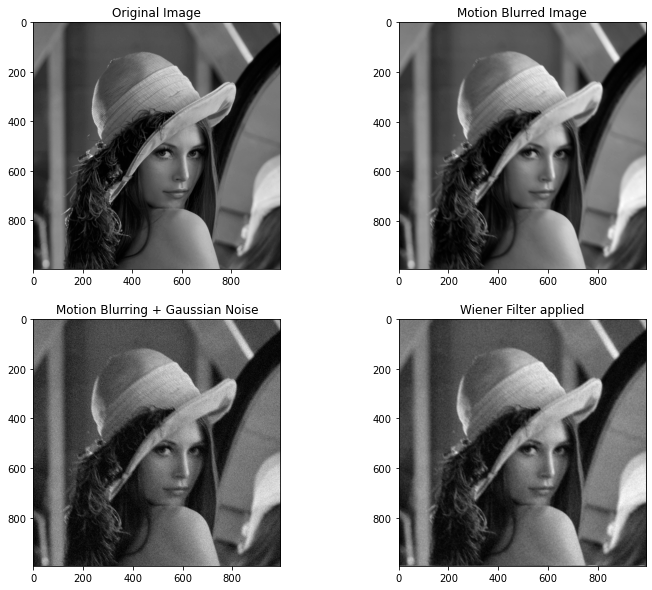

In [3]:
# Load image and convert it to gray scale
file_name = os.path.join('lena1000p.jpg') 
img = rgb2gray(plt.imread(file_name))

# Blur the image
blurred_img = blur(img, kernel_size = 7)

# Add Gaussian noise
noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

# Apply Wiener Filter
kernel = gaussian_kernel(5)
filtered_img = wiener_filter(noisy_img, kernel, K = 10)

# Display results
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
	fig.add_subplot(2, 2, i+1)
	plt.imshow(display[i], cmap = 'gray')
	plt.title(label[i])

plt.show()

In [4]:
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

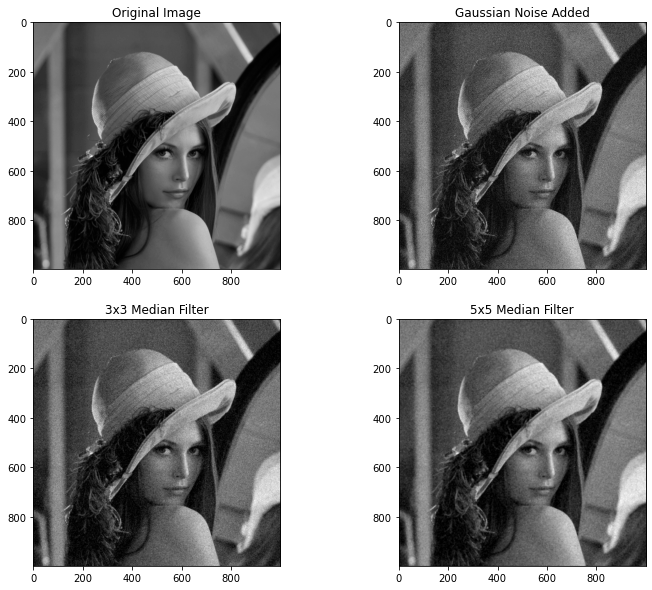

In [5]:
file_name = os.path.join('lena1000p.jpg')
img = rgb2gray(plt.imread(file_name))

# Add Gaussian noise
noisy_img = add_gaussian_noise(img, 30)

# Apply Median Filter
removed_noise_3 = median_filter(noisy_img, 3)
removed_noise_5 = median_filter(noisy_img, 5)

# Display results
fig = plt.figure(figsize = (12, 10))
display = [img, noisy_img, removed_noise_3, removed_noise_5]
title = ['Original Image', 'Gaussian Noise Added', '3x3 Median Filter', '5x5 Median Filter']

for i in range(len(display)):
      fig.add_subplot(2, 2, i+1)
      plt.imshow(display[i], cmap = 'gray')
      plt.title(title[i])

plt.show()

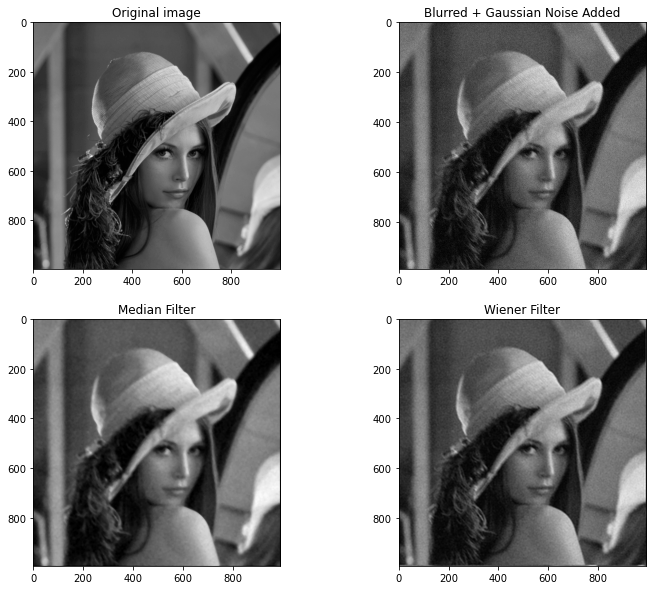

In [1]:
import os
import matplotlib.pyplot as plt
from Median_Filter import median_filter, add_gaussian_noise, rgb2gray
from Wiener_Filter import blur, gaussian_kernel, wiener_filter

if __name__ == '__main__':
	# Load image and convert it to gray scale
	file_name = os.path.join('lena1000p.jpg')
	img = rgb2gray(plt.imread(file_name))

	# Blur image
	blurred_img = blur(img, kernel_size = 9)

	# Add Gaussian noise
	noisy_img = add_gaussian_noise(blurred_img, 20)

	# Apply Median Filter
	median_filter = median_filter(noisy_img, 9)

	# Apply Wiener Filter
	wiener_filter = wiener_filter(noisy_img, gaussian_kernel(9), K = 0.5)

	# Display results
	fig = plt.figure(figsize = (12, 10))

	display = [img, noisy_img, median_filter, wiener_filter]
	title = ['Original image', 'Blurred + Gaussian Noise Added', 
			 'Median Filter', 'Wiener Filter']

	for i in range(len(display)):
		fig.add_subplot(2, 2, i+1)
		plt.imshow(display[i], cmap = 'gray')
		plt.title(title[i])
	
	plt.show()